In [45]:
import pandas as pd
import numpy as np
import hrvanalysis as hrv
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import scipy.stats as ss

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [20]:
sb.set(font_scale=1)

In [22]:
ecg_data = sorted(glob.glob('*ECG*', recursive=True))[-1]
peaks_data = sorted(glob.glob('*peaks*', recursive=True))[-1]

In [23]:
df_ecg = pd.read_csv(ecg_data, header=None, sep=' ', names=['x', 'y'], index_col=0)
df_peaks = pd.read_csv(peaks_data, header=None, sep=' ', names=['x', 'y'], index_col=0)
df_peaks = df_peaks[df_peaks > 500].dropna()

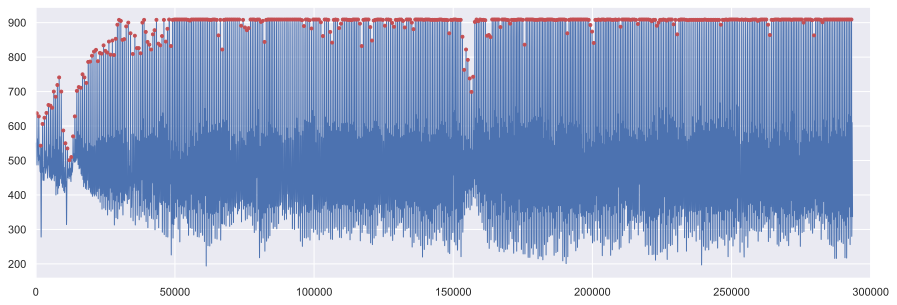

In [24]:
plt.figure(figsize=(15,5))
plt.xlim(0, 300000)
plt.plot(df_ecg, lw=1)
plt.plot(df_peaks, 'ro', ms=3)

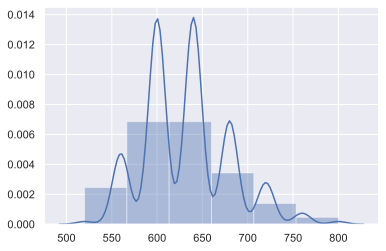

In [56]:
rr = np.diff(df_peaks.index)
sb.distplot(rr, bins=6)

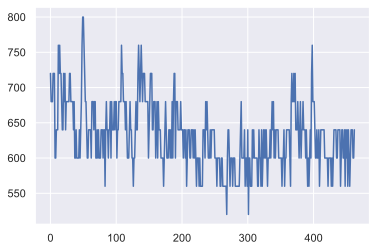

In [29]:
sb.lineplot(range(len(rr)), rr)

In [30]:
rr = np.array(hrv.remove_outliers(rr, low_rri=300, high_rri=1250))
rr = rr[~np.isnan(rr)].astype(np.int)

0 outlier(s) have been deleted.


In [34]:
fdf = hrv.get_frequency_domain_features(rr)
fdf

{'lf': 706.476079756226,
 'hf': 279.1364471207766,
 'lf_hf_ratio': 2.530934555638835,
 'lfnu': 71.67888602174686,
 'hfnu': 28.32111397825312,
 'total_power': 1252.2766306493554,
 'vlf': 266.6641037723528}

In [35]:
ccf = hrv.get_csi_cvi_features(rr)
ccf

{'csi': 2.1550942612419344,
 'cvi': 4.4397249721099366,
 'Modified_csi': 524.8822563706431}

In [36]:
tdf = hrv.get_time_domain_features(rr)
tdf

{'mean_nni': 632.2246220302376,
 'sdnn': 47.46401323757368,
 'sdsd': 39.91295038741216,
 'nni_50': 51,
 'pnni_50': 11.01511879049676,
 'nni_20': 277,
 'pnni_20': 59.827213822894166,
 'rmssd': 39.91332600866023,
 'median_nni': 640.0,
 'range_nni': 280,
 'cvsd': 0.06313155897106343,
 'cvnni': 0.07507460415754515,
 'mean_hr': 95.42342474541954,
 'max_hr': 115.38461538461539,
 'min_hr': 75.0,
 'std_hr': 6.975793354421079}

In [83]:
hrv_score = 20*np.log(tdf['rmssd'])

mode = ss.mode(rr)[0][0]
hist = np.histogram(rr, bins=np.arange(0, 2500, 50))
mid1 = np.argwhere(hist[1] == mode).item()
mid2 = mid1 + 1
amo = (hist[0][mid1:mid2].item() / len(rr)) * 100
isb = amo / (2 * mode) / (rr.max() - rr.min()) * 1000 * 1000

hrv_score, isb

(73.73420506629274, 190.27049264630256)

In [12]:
hrv.get_poincare_plot_features(rr)

{'sd1': 28.253311617199046,
 'sd2': 60.888549727305744,
 'ratio_sd2_sd1': 2.1550942612419344}

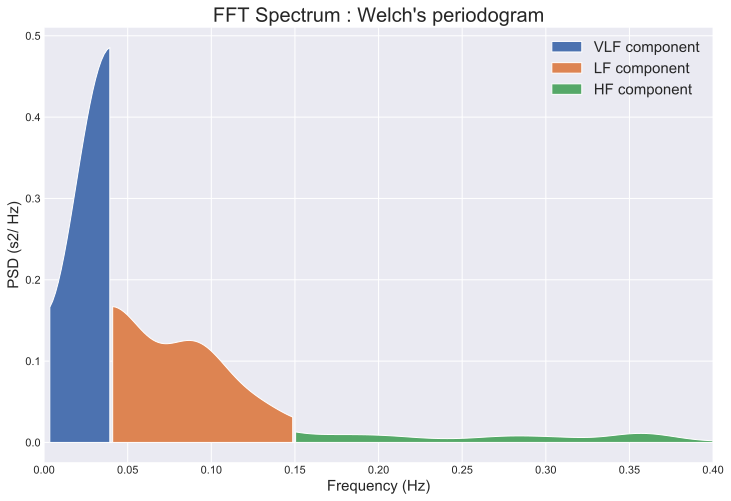

In [13]:
hrv.plot.plot_psd(rr)